In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

def generate_data(n_samples, flagc):
    
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        
    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)
        
    elif flagc == 3:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples,
                          centers=4,
                          cluster_std=[1.0, 2.5, 0.5, 3.0],
                          random_state=random_state)

    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
        
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
    
    else:
        X = []
        
    return X

## 1. Zadatak

Broj klastera: (Max 10): 3


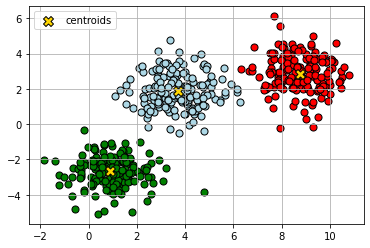

In [7]:
np.random.seed() 
data_train=generate_data(500,1) 

numOfClusters = int(input("Broj klastera: (Max 10): "))
km = KMeans(n_clusters=numOfClusters
            , init='random',n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_kmeans = km.fit_predict(data_train)
colors = ['lightblue', 'green', 'red','yellow','aqua','darkorange', 'lime','azure','magenta','indigo']
markCounter=0
colorCounter=0
for i in range(0,numOfClusters):
    if(colorCounter == numOfClusters or markCounter== numOfClusters):
        markCounter = 0
        colorCounter= 0
    plt.scatter(data_train[y_kmeans==i,0],data_train[y_kmeans == i,1],s=50,c=colors[colorCounter],edgecolors='black')
    markCounter = markCounter+1
    colorCounter = colorCounter+1
    
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=100, marker='X',
    c='gold', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()


## 2. Zadatak

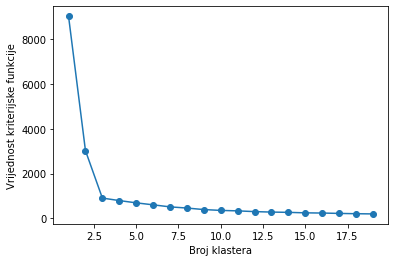

In [8]:
plt.figure(1)
distortions = []
for i in range(1, 20):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(data_train)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Broj klastera')
plt.ylabel('Vrijednost kriterijske funkcije')
plt.show()

## 3. Zadatak

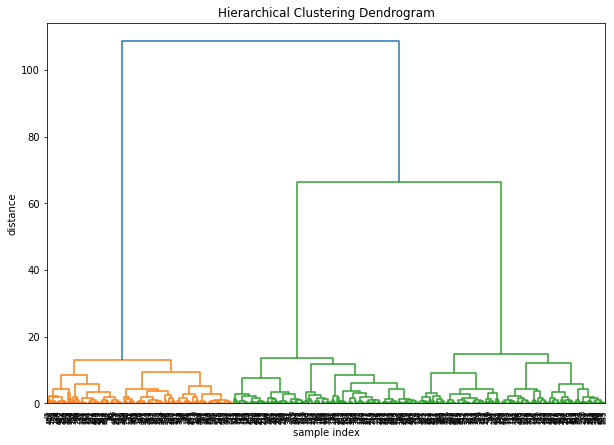

In [10]:
scipyField = linkage(data_train,'ward')
plt.figure(figsize=(10,7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    scipyField,
    leaf_rotation=90.,
    leaf_font_size=7.,
)
plt.show()

##4. Zadatak

313344000.0
293317584.9609375


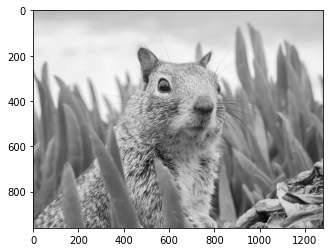

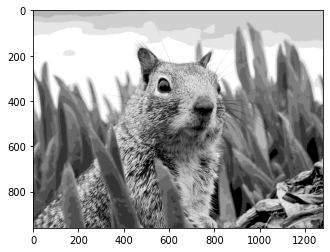

In [33]:
import scipy as sp
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/example_grayscale.png') 
img_reshaped = img.reshape((-1, 1))
k_means2 = cluster.KMeans(n_clusters=10,n_init=1)
k_means2.fit(img_reshaped) 
values = k_means2.cluster_centers_.squeeze()
labels = k_means2.labels_
img_compressed = np.choose(labels, values)
img_compressed.shape = img.shape
print(np.max(img)*255*img.size)
print(np.max(img_compressed)*255*img.size)

plt.figure(3)
plt.imshow(img,  cmap='gray')

plt.figure(4)
plt.imshow(img_compressed,  cmap='gray')

## 5. Zadatak

940032000.0
873325942.3828125


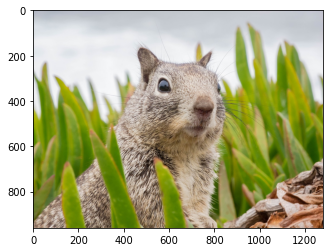

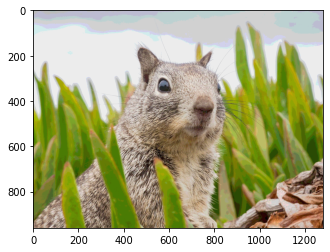

In [37]:
img = mpimg.imread('/content/example.png') 
img_reshaped = img.reshape((-1, 1))
k_means2 = cluster.KMeans(n_clusters=10,n_init=1)
k_means2.fit(img_reshaped) 
values = k_means2.cluster_centers_.squeeze()
labels = k_means2.labels_
img_compressed = np.choose(labels, values)
img_compressed.shape = img.shape
print(np.max(img)*255*img.size)
print(np.max(img_compressed)*255*img.size)

plt.figure(3)
plt.imshow(img)

plt.figure(4)
plt.imshow(img_compressed)

## 6. Zadatak

In [81]:
import numpy as np

class KMeans:

    def __init__(self, n_clusters=5):
        self.n_clusters = n_clusters
        self.centroids = None

    def fit(self, X):
        # randomly initialize centroids
        self.centroids = X[np.random.randint(X.shape[0], size=self.n_clusters), :]
        while True:
          plt.figure(1)
          plt.scatter(
                self.centroids[:, 0], self.centroids[:, 1],
                s=100, marker='X',
                c='gold', edgecolor='black',
                label='centroids'
            )
          old = self.centroids
          # calculate distances between data points and centroids
          distances = np.array([np.linalg.norm(X - c, axis=1) for c in self.centroids])

          # assign data points to closest centroid
          clusters = np.argmin(distances, axis=0)

          # calculate new centroids
          new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(self.n_clusters)])

          # check for convergence
          if np.all(self.centroids == new_centroids):
              break
          else:
              self.centroids = new_centroids
              for i in range(len(new_centroids)):
                x_values = [new_centroids[i,0], old[i,0]]
                y_values = [new_centroids[i,1], old[i,1]]
                plt.plot(x_values, y_values, 'bo', linestyle="--")

    def predict(self, X):
        # calculate distances between data points and centroids
        distances = np.array([np.linalg.norm(X - c, axis=1) for c in self.centroids])

        # assign data points to closest centroid
        clusters = np.argmin(distances, axis=0)

        return clusters

Broj klastera: (Max 10): 3


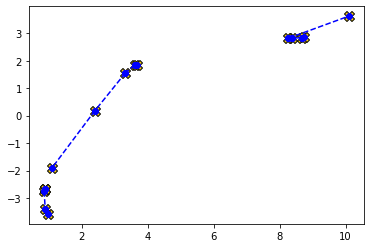

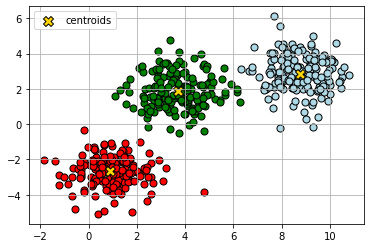

In [82]:
np.random.seed() 
data_train=generate_data(500,1) 

numOfClusters = int(input("Broj klastera: (Max 10): "))
km = KMeans(numOfClusters)
km.fit(data_train)
y_kmeans = km.predict(data_train)
colors = ['lightblue', 'green', 'red','yellow','aqua','darkorange', 'lime','azure','magenta','indigo']
markCounter=0
colorCounter=0
plt.figure(2)
for i in range(0,numOfClusters):
    if(colorCounter == numOfClusters or markCounter== numOfClusters):
        markCounter = 0
        colorCounter= 0
    plt.scatter(data_train[y_kmeans==i,0],data_train[y_kmeans == i,1],s=50,c=colors[colorCounter],edgecolors='black')
    markCounter = markCounter+1
    colorCounter = colorCounter+1
    
# plot the centroids
plt.scatter(
    km.centroids[:, 0], km.centroids[:, 1],
    s=100, marker='X',
    c='gold', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()